In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# generate all matrices and their inverses, since not all matrices can be inverted

In [27]:
np.random.seed(55)
matList = [np.random.randint(0,10, (3,3))]

In [28]:
i = 1
while i < 10501:
  matList.append(np.random.randint(0,10, (3,3)))
  i += 1

In [29]:
len(matList)

10501

In [30]:
invList = []
for x in matList:
    try:
        inverse = np.linalg.inv(x)
        invList.append([x, inverse])
    except np.linalg.LinAlgError:
    # Not invertible. Skip this one.
        pass

In [31]:
len(invList) #the number of matrices that can be inverted

10369

In [32]:
# so we have 1417 out of 1501 matrices

In [33]:
# dont worry about a formula for finding the inverse of a matrix but use 
# linear regression for each element of the inverted matrix as a formula from 
# each element of the original matrix and look for a relationship

In [34]:
#convert to dataframe
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

In [35]:
for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)
df

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,original22,inverse00,inverse01,inverse02,inverse10,inverse11,inverse12,inverse20,inverse21,inverse22
0,"[[7, 8, 5], [7, 5, 1], [6, 0, 3]]","[[-0.09090909090909093, 0.14545454545454548, 0...",7,8,5,7,5,1,6,0,3,-0.090909,0.145455,0.103030,0.090909,0.054545,-0.169697,0.181818,-0.290909,0.127273
1,"[[8, 7, 1], [5, 7, 8], [3, 7, 0]]","[[0.21052631578947367, -0.02631578947368421, -...",8,7,1,5,7,8,3,7,0,0.210526,-0.026316,-0.184211,-0.090226,0.011278,0.221805,-0.052632,0.131579,-0.078947
2,"[[7, 2, 1], [8, 0, 8], [9, 8, 4]]","[[0.21052631578947376, 0.0, -0.052631578947368...",7,2,1,8,0,8,9,8,4,0.210526,0.000000,-0.052632,-0.131579,-0.062500,0.157895,-0.210526,0.125000,0.052632
3,"[[5, 4, 9], [1, 8, 2], [0, 7, 2]]","[[0.03076923076923076, 0.8461538461538461, -0....",5,4,9,1,8,2,0,7,2,0.030769,0.846154,-0.984615,-0.030769,0.153846,-0.015385,0.107692,-0.538462,0.553846
4,"[[8, 0, 5], [6, 3, 8], [7, 2, 1]]","[[0.087248322147651, -0.06711409395973154, 0.1...",8,0,5,6,3,8,7,2,1,0.087248,-0.067114,0.100671,-0.335570,0.181208,0.228188,0.060403,0.107383,-0.161074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,"[[6, 0, 9], [8, 2, 5], [7, 8, 1]]","[[-0.17117117117117114, 0.32432432432432434, -...",6,0,9,8,2,5,7,8,1,-0.171171,0.324324,-0.081081,0.121622,-0.256757,0.189189,0.225225,-0.216216,0.054054
10365,"[[3, 1, 2], [7, 2, 3], [8, 2, 1]]","[[-4.0, 3.0, -1.0], [17.0, -13.0, 5.0], [-2.0,...",3,1,2,7,2,3,8,2,1,-4.000000,3.000000,-1.000000,17.000000,-13.000000,5.000000,-2.000000,2.000000,-1.000000
10366,"[[9, 7, 3], [1, 3, 3], [3, 3, 4]]","[[0.06818181818181819, -0.4318181818181818, 0....",9,7,3,1,3,3,3,3,4,0.068182,-0.431818,0.272727,0.113636,0.613636,-0.545455,-0.136364,-0.136364,0.454545
10367,"[[8, 5, 6], [0, 3, 9], [7, 6, 2]]","[[0.24615384615384617, -0.13333333333333333, -...",8,5,6,0,3,9,7,6,2,0.246154,-0.133333,-0.138462,-0.323077,0.133333,0.369231,0.107692,0.066667,-0.123077


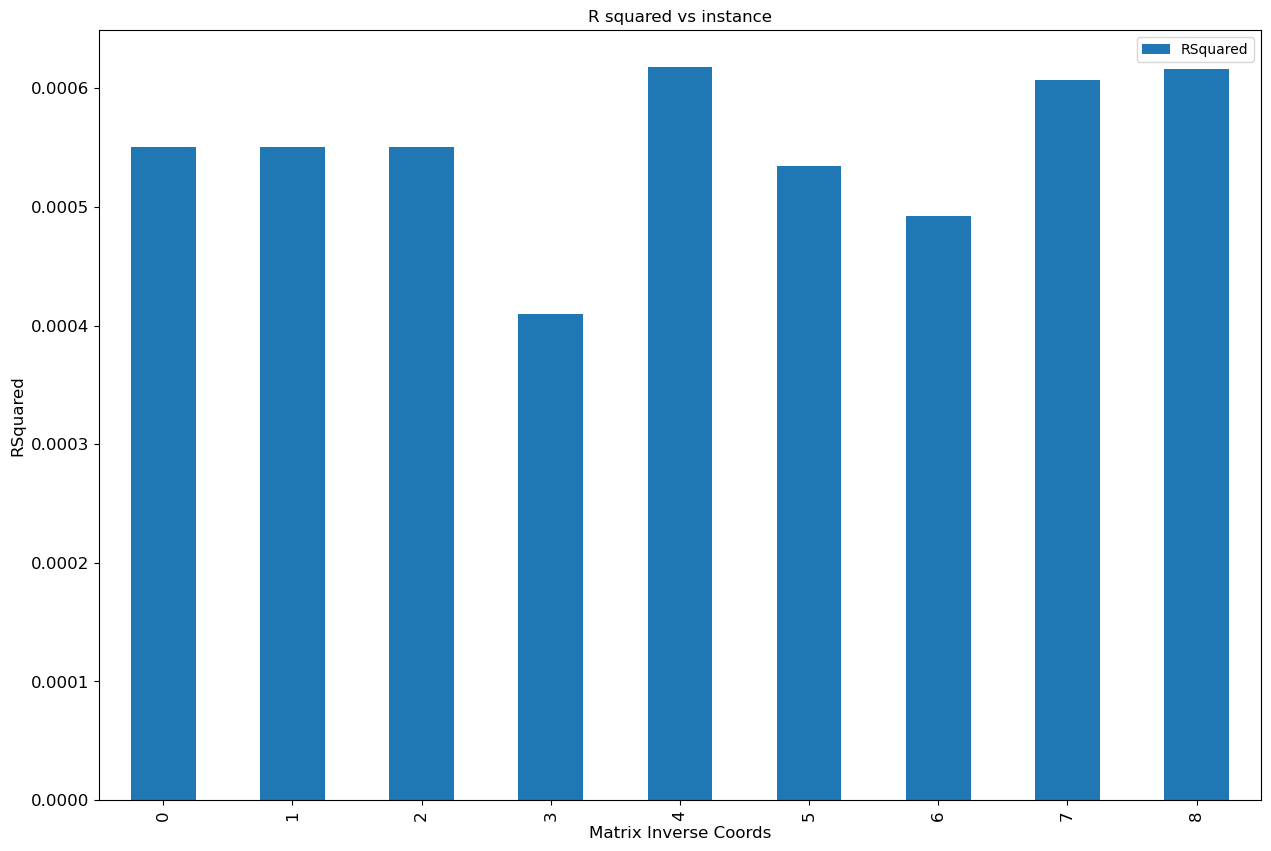

0.0005477578863255999

In [36]:
import statsmodels.api as sm

coords = []
fit = []

dflm = df.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dflm = df.copy()
        y = dflm['inverse'+str(i)+str(j)]
        dflm.drop('original', axis=1, inplace=True)
        dflm.drop('inverse', axis=1, inplace=True)
        dflm.drop('inverse00', axis=1, inplace=True)
        dflm.drop('inverse01', axis=1, inplace=True)
        dflm.drop('inverse02', axis=1, inplace=True)
        dflm.drop('inverse10', axis=1, inplace=True)
        dflm.drop('inverse11', axis=1, inplace=True)
        dflm.drop('inverse12', axis=1, inplace=True)
        dflm.drop('inverse20', axis=1, inplace=True)
        dflm.drop('inverse21', axis=1, inplace=True)
        dflm.drop('inverse22', axis=1, inplace=True)
        X = dflm[dflm.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [37]:
#the first corner of the inverse matrix does not have a linear relationship with other components

In [38]:
df = pd.DataFrame(data=invList)
df.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        df['original'+str(i)+str(j)] = df.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        df['inverse'+str(i)+str(j)] = df.apply(lambda row: row['inverse'][i][j], axis=1)

dflm = df.copy()
y = dflm['inverse01']
dflm.drop('inverse00', axis=1, inplace=True)
dflm.drop('inverse01', axis=1, inplace=True)
dflm.drop('inverse02', axis=1, inplace=True)
dflm.drop('inverse10', axis=1, inplace=True)
dflm.drop('inverse11', axis=1, inplace=True)
dflm.drop('inverse12', axis=1, inplace=True)
dflm.drop('inverse20', axis=1, inplace=True)
dflm.drop('inverse21', axis=1, inplace=True)
dflm.drop('inverse22', axis=1, inplace=True)
dflm.drop('original', axis=1, inplace=True)
dflm.drop('inverse', axis=1, inplace=True)
X = dflm[dflm.columns]
X_withconstant = X
lm_00 = sm.OLS(y,X_withconstant)
lm_00_results = lm_00.fit()
lm_00_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              inverse01   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.6340
Date:                Fri, 19 Jan 2024   Prob (F-statistic):                       0.769
Time:                        06:17:03   Log-Likelihood:                     -6.9567e+05
No. Observations:               10369   AIC:                                  1.391e+06
Df Residuals:                   10360   BIC:                                  1.391e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
original00  -2.23e+25   1.07e+26     -0.209      0.834   -2.31e+26    1.87e+26
original01  9.358e+25   1.08e+26      0.868      0.386   -1.18e+26    3.05e+26
original02 -6.317e+25   1.07e+26     -0.589      0.556   -2.73e+26    1.47e+26
original10  5.879e+25   1.08e+26      0.545      0.586   -1.53e+26     2.7e+26
original11  1.797e+26   1.08e+26      1.661      0.097   -3.23e+25    3.92e+26
original12 -2.475e+25   1.07e+26     -0.231      0.817   -2.35e+26    1.85e+26
original20 -2.156e+25   1.07e+26     -0.202      0.840   -2.31e+26    1.88e+26
original21 -2.464e+25   1.08e+26     -0.228      0.820   -2.36e+26    1.87e+26
original22 -1.007e+26   1.07e+26     -0.938      0.348   -3.11e+26     1.1e+26
==============================================================================
Omnibus:                    41477.564   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      46340550724.415
Skew:                         101.744   Prob(JB):                         0.00
Kurtosis:                   10357.614   Cond. No.                         4.94
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# inverse 1 0 coefficients for linear regression are quite unreasonable

In [40]:
# consider linear combinations of multipying all combinations of two items

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
dflm = dflm.drop('original00x00', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
dflm = dflm.drop('original01x01', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
dflm = dflm.drop('original02x02', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
dflm = dflm.drop('original10x10', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
dflm = dflm.drop('original11x11', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
dflm = dflm.drop('original12x12', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
dflm = dflm.drop('original20x20', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
dflm = dflm.drop('original21x21', axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
dflm = dflm.drop('original22x22', axis=1)
  

In [41]:
dflm

,original,inverse,original00,original01,original02,original10,original11,original12,original20,original21,...,original21x20,original21x22,original22x00,original22x01,original22x02,original22x10,original22x11,original22x12,original22x20,original22x21
0,"[[7, 8, 5], [7, 5, 1], [6, 0, 3]]","[[-0.09090909090909093, 0.14545454545454548, 0...",7,8,5,7,5,1,6,0,...,0,0,21,24,15,21,15,3,18,0
1,"[[8, 7, 1], [5, 7, 8], [3, 7, 0]]","[[0.21052631578947367, -0.02631578947368421, -...",8,7,1,5,7,8,3,7,...,21,0,0,0,0,0,0,0,0,0
2,"[[7, 2, 1], [8, 0, 8], [9, 8, 4]]","[[0.21052631578947376, 0.0, -0.052631578947368...",7,2,1,8,0,8,9,8,...,72,32,28,8,4,32,0,32,36,32
3,"[[5, 4, 9], [1, 8, 2], [0, 7, 2]]","[[0.03076923076923076, 0.8461538461538461, -0....",5,4,9,1,8,2,0,7,...,0,14,10,8,18,2,16,4,0,14
4,"[[8, 0, 5], [6, 3, 8], [7, 2, 1]]","[[0.087248322147651, -0.06711409395973154, 0.1...",8,0,5,6,3,8,7,2,...,14,2,8,0,5,6,3,8,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,"[[6, 0, 9], [8, 2, 5], [7, 8, 1]]","[[-0.17117117117117114, 0.32432432432432434, -...",6,0,9,8,2,5,7,8,...,56,8,6,0,9,8,2,5,7,8
10365,"[[3, 1, 2], [7, 2, 3], [8, 2, 1]]","[[-4.0, 3.0, -1.0], [17.0, -13.0, 5.0], [-2.0,...",3,1,2,7,2,3,8,2,...,16,2,3,1,2,7,2,3,8,2
10366,"[[9, 7, 3], [1, 3, 3], [3, 3, 4]]","[[0.06818181818181819, -0.4318181818181818, 0....",9,7,3,1,3,3,3,3,...,9,12,36,28,12,4,12,12,12,12
10367,"[[8, 5, 6], [0, 3, 9], [7, 6, 2]]","[[0.24615384615384617, -0.13333333333333333, -...",8,5,6,0,3,9,7,6,...,42,12,16,10,12,0,6,18,14,12


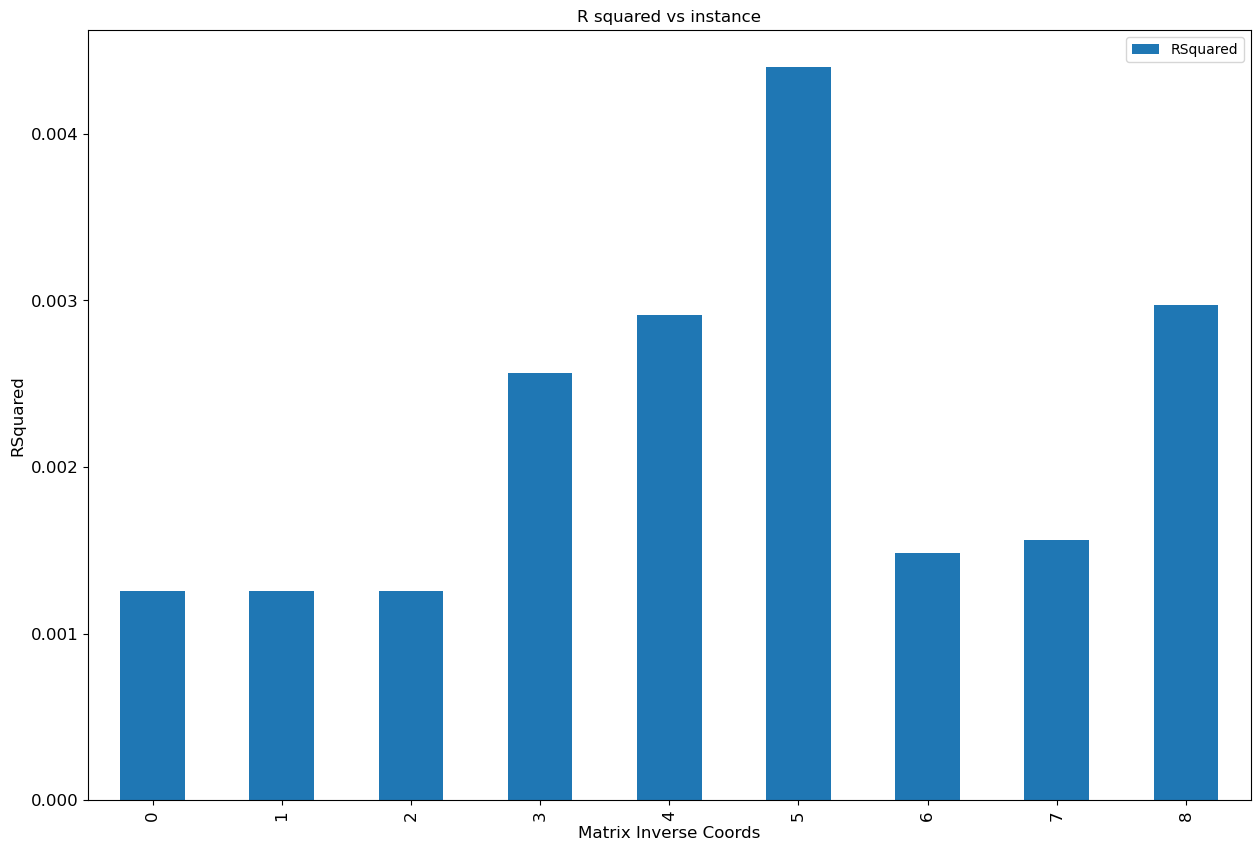

0.0021842016127471275

In [42]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [43]:
# when adding the combinations of multiplication of two matrix elements to the linear regression the average r squared value 
# increases from 0.0039 to 0.016 which is quite significant

In [44]:
# unfortunately the average r sqaured value is way to low to be able to determine the inverse of a matrix by linear regression

In [45]:
# this is expected although it is a neat result to see how the average r sqaured value significantly increased by adding the 
# combinations of multiplying two matrix elements

In [46]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2], axis=1)
  

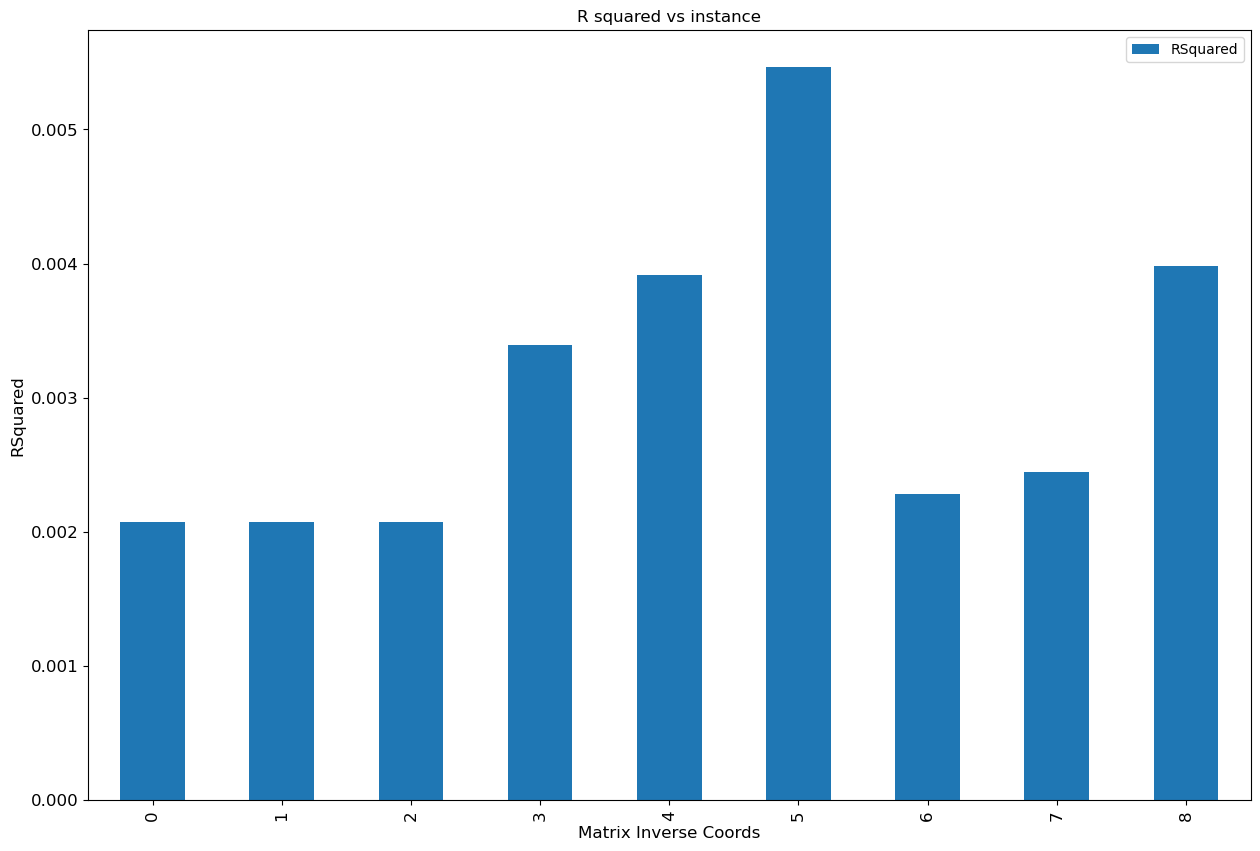

0.0030766791903087767

In [47]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()

In [48]:
#very interesting, the average r squared value increases by 6% when the square of each element to the linear regression

In [49]:
# consider linear combinations of multipying all combinations of two items, along with the square of each element in the matrix

dflm = pd.DataFrame(data=invList)
dflm.columns = ['original', 'inverse']

for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['inverse'+str(i)+str(j)] = dflm.apply(lambda row: row['inverse'][i][j], axis=1)

        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original00x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][0] * row['original'][0][0] , axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original01x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][1] * row['original'][0][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original02x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][0][2] * row['original'][0][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original10x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][0] * row['original'][1][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original11x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][1] * row['original'][1][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original12x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][1][2] * row['original'][1][2], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original20x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][0] * row['original'][2][0], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original21x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][1] * row['original'][2][1], axis=1)
        
for i in [0,1,2]:
    for j in [0,1,2]:
        dflm['original22x'+str(i)+str(j)] = dflm.apply(lambda row: row['original'][i][j] * row['original'][2][2] * row['original'][1][2], axis=1)
  

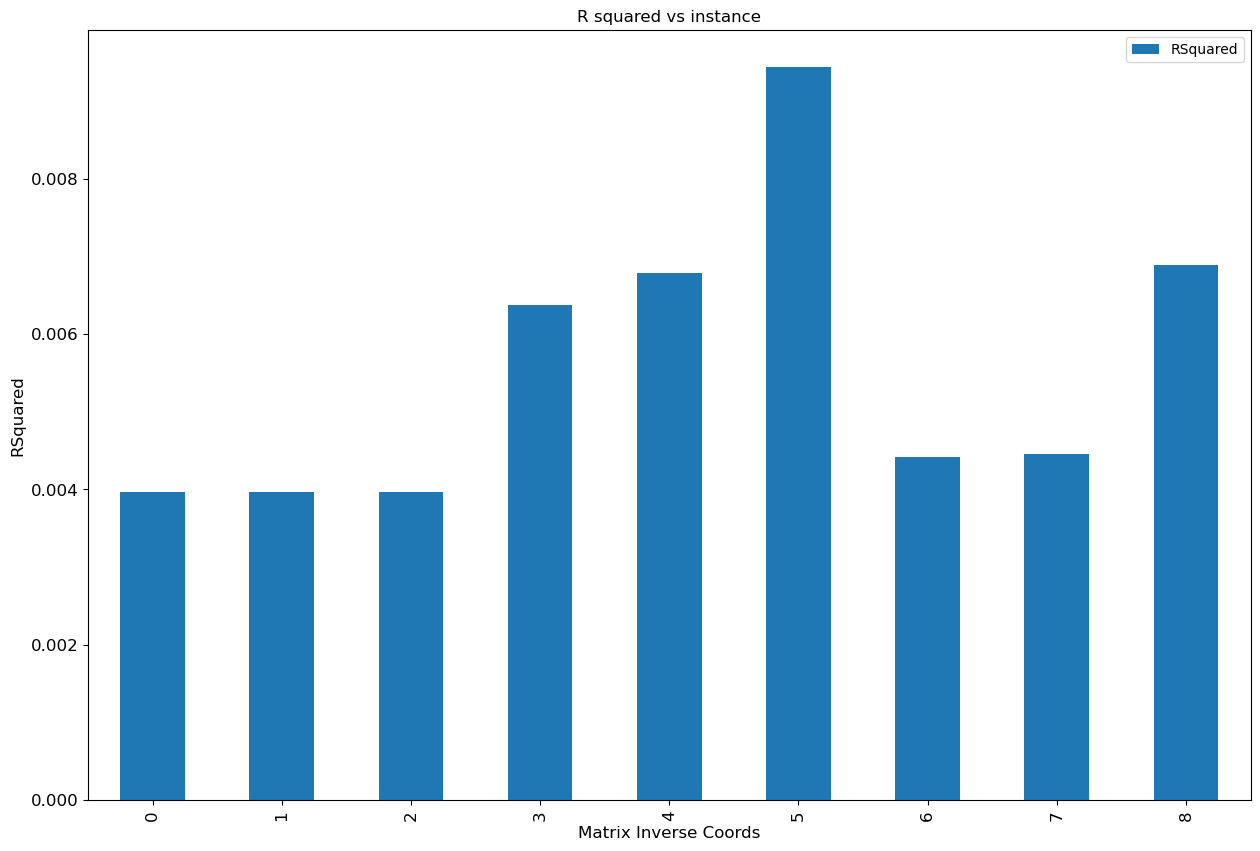

0.005586536582338369

In [50]:
coords = []
fit = []

dflm2 = dflm.copy()

for i in (0,1,2):
    for j in (0,1,2):
        dfl = dflm2.copy()
        y = dfl['inverse'+str(i)+str(j)]
        dfl.drop('original', axis=1, inplace=True)
        dfl.drop('inverse', axis=1, inplace=True)
        dfl.drop('inverse00', axis=1, inplace=True)
        dfl.drop('inverse01', axis=1, inplace=True)
        dfl.drop('inverse02', axis=1, inplace=True)
        dfl.drop('inverse10', axis=1, inplace=True)
        dfl.drop('inverse11', axis=1, inplace=True)
        dfl.drop('inverse12', axis=1, inplace=True)
        dfl.drop('inverse20', axis=1, inplace=True)
        dfl.drop('inverse21', axis=1, inplace=True)
        dfl.drop('inverse22', axis=1, inplace=True)
        X = dfl[dfl.columns]
        X_withconstant = X
        lm = sm.OLS(y,X_withconstant)
        fit.append([ str(i)+" "+str(j),lm.fit().rsquared])
        
import matplotlib.pyplot as plt
ax = pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).plot(kind='bar', title ="R squared vs instance", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Matrix Inverse Coords", fontsize=12)
ax.set_ylabel("RSquared", fontsize=12)
plt.show()

pd.DataFrame(fit, columns=['Matrix Inverse Coords', 'RSquared']).loc[:, 'RSquared'].mean()